In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%cd 'drive/My Drive/Thesis'

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
# import uniform distribution
from scipy.stats import uniform
from scipy.stats import binom
from scipy.stats import norm
import scipy.special as sc
import scipy.optimize
from scipy.optimize import fsolve
import time
np.random.seed(5)

In [2]:
def auction_exp(data_auction, p):
    """Train a normalizing flow model with maximum likelihood.

    Args:
        model: normalizing flow model. Flow or StackedFlows
        dataset: dataset containing data to fit. Dataset
        batch_size: number of samples per batch. int
        max_epochs: number of training epochs. int
        frequency: frequency for plotting density visualization. int
        
    Return:
        model: trained model. Flow or StackedFlows
        losses: loss evolution during training. list of floats
    """
    revenue = 0
    for bid in data_auction:
        if bid >= p:
          #change the bidder with price p
          revenue += p
    
    revenue = revenue/len(data_auction)
    return revenue

In [3]:
def rejection_sampling(pi1, pi2, N):

  # def f(x):
  #   return [x[0] * (1 + np.log(x[1]/x[0])) - u,
  #           x[0] *(2*x[1]-x[0]) - u**2 - sigma**2]


  # root = fsolve(f, [ini1,ini2])
    
  # pi1 = min(root)
  # pi2 = max(root)
  #using rejection sampling, get N random price samples
  n = 0
  #A =(pi2/pi1-1)*(pi2-pi1)/don
  don = pi2*np.log(pi2/pi1) - (pi2-pi1)
  env =(pi2/pi1-1)/don
  rej_sample =[]
  while(n <= N):
    x = uniform.rvs(loc=pi1, scale=pi2-pi1)
    a = (pi2/x-1)/don/env
    u1 = uniform.rvs()
    if (u1 <= a):
      rej_sample.append(x)
      n += 1
  return rej_sample

In [ ]:
def f(x):
  return (x * (1 + np.log(k2/(x**2) + 1) - np.log(2)) -u )

k2 = 1000
pi1 = fsolve(f, [50])
pi2 = 0.5*(k2/pi1 +pi1)
print(pi1,pi2)

In [62]:
# Experiment Randomization auction first compute the log-lottery with uniform distribution:
sigma_list = []
DAPX_uniform = []
r_list =[]
reserve_p_list = []
p_d_list = []
r_rho_list=[]

APX_uniform_list = []
#step =np.linspace(0, 5,5)
step = np.arange(0, 5, 0.1)
n = 1000000

def F(x):
    return ((x-1)**3)/((2*x-1)**2) - r**2   


#theorem 2 
def random_rho(x):
    return ((2*np.exp(x-1)-1)-(x**2)*r**2 - x**2)

def f(x):
    return (x * (1 + np.log(k2/(x**2) + 1) - np.log(2)) -u )
 
tic = time.clock()
for i in step:
    b = 10 - i
    a = 10 -b
    u = (a+b)/2
    sigma = np.sqrt((b-a)**2/12)

    bid_uniform = uniform.rvs(loc=a, scale=b-a,size=n)
    r = sigma/u
    r_list.append(r)
    sigma_list.append(sigma)

    p_d = fsolve(F, [u])
    print(F(p_d))
    p_d_list.append(p_d)
    p_reserve = p_d*u/(2*p_d-1)

    if (b/2 >= a):
        opt = auction_exp(bid_uniform,b/2)
    else:
        opt = auction_exp(bid_uniform,a)
    exp_revenue = auction_exp(bid_uniform,p_reserve)

    DAPX_uniform.append((opt/exp_revenue)[0])  

    k2 = u**2 + sigma**2
    pi1 = fsolve(f, [u-0.5])
    pi2 = 0.5*(k2/pi1 +pi1)
    print(f(pi1))
    rej_sample = []
    rej_sample = rejection_sampling(pi1,pi2,n)
    rexp_revenue_list =[]

    for rp_reserve in rej_sample:
        rexp_revenue_list.append(auction_exp(uniform.rvs(loc=a, scale=b-a,size=1),rp_reserve))
  
    APX_uniform_list.append(opt/np.average(rexp_revenue_list))
    #compute the APX using full-bundle log lottery randomization 
    r_rho = fsolve(random_rho, [u])
    r_rho_list.append(r_rho[0])
    print(random_rho(r_rho))

toc = time.clock()
print('time: ' + str(toc-tic))


C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


[0.]
[8.8817842e-16]
[8.8817842e-16]
[0.]
[0.]
[-8.8817842e-16]
[5.55111512e-17]
[-1.42108547e-14]
[8.8817842e-16]
[2.22044605e-16]
[0.]
[-1.77635684e-15]
[3.88578059e-16]
[8.8817842e-16]
[1.77635684e-15]
[9.43689571e-16]
[0.]
[-1.77635684e-15]
[1.99840144e-15]
[3.55271368e-15]
[-1.77635684e-15]
[4.49640325e-15]
[8.43769499e-14]
[3.55271368e-15]
[1.01307851e-14]
[0.]
[1.33226763e-14]
[2.77555756e-17]
[0.]
[4.52970994e-14]
[2.77555756e-17]
[-8.8817842e-16]
[1.54543045e-13]
[-2.77555756e-17]
[7.99360578e-15]
[5.15143483e-13]
[-5.55111512e-17]
[4.61852778e-14]
[8.8817842e-16]
[0.]
[5.41788836e-14]
[1.77635684e-15]
[-2.77555756e-17]
[3.90798505e-14]
[8.8817842e-16]
[-2.77555756e-17]
[1.59872116e-14]
[0.]
[0.]
[8.8817842e-16]
[-8.8817842e-16]
[2.77555756e-17]
[-3.55271368e-14]
[8.8817842e-16]
[0.]
[0.]
[3.55271368e-15]
[2.77555756e-17]
[-8.8817842e-16]
[1.24344979e-14]
[8.32667268e-17]
[2.66453526e-15]
[6.1284311e-14]
[1.94289029e-16]
[1.24344979e-14]
[2.65565347e-13]
[6.9388939e-16]
[-1.77

C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:67: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [31]:
# Experiment Randomization auction first compute the log-lottery with uniform distribution:
sigma_list = []
DAPX_uniform = []
r_list =[]
reserve_p_list = []
p_d_list = []
r_rho_list=[]

APX_uniform_list = []
#step =np.linspace(0, 5,5)
step = np.arange(0, 5, 0.1)
n = 100000

def F(x):
    return ((x-1)**3)/((2*x-1)**2) - r**2   


#theorem 2 
def random_rho(x):
    return ((2*np.exp(x-1)-1)-(x**2)*r**2 - x**2)

def f(x):
    return (x * (1 + np.log(k2/(x**2) + 1) - np.log(2)) -u )
 
tic = time.clock()
for i in step:
    b = 10 - i
    a = 10 -b
    u = (a+b)/2
    sigma = np.sqrt((b-a)**2/12)

    bid_uniform = uniform.rvs(loc=a, scale=b-a,size=n)
    r = sigma/u
    r_list.append(r)
    sigma_list.append(sigma)

    p_d = fsolve(F, [u])
    print(F(p_d))
    p_d_list.append(p_d)
    p_reserve = p_d*u/(2*p_d-1)

    if (b/2 >= a):
        opt = auction_exp(bid_uniform,b/2)
    else:
        opt = auction_exp(bid_uniform,a)
    exp_revenue = auction_exp(bid_uniform,p_reserve)

    DAPX_uniform.append((opt/exp_revenue)[0])  

    k2 = u**2 + sigma**2
    pi1 = fsolve(f, [u-0.5])
    pi2 = 0.5*(k2/pi1 +pi1)
    print(f(pi1))
    rej_sample = []
    rej_sample = rejection_sampling(pi1,pi2,10000)
    rexp_revenue_list =[]
    for rp_reserve in rej_sample:
        rexp_revenue = auction_exp(bid_uniform,rp_reserve)
        rexp_revenue_list.append(rexp_revenue)
  
    APX_uniform_list.append(opt/np.average(rexp_revenue_list))
    #compute the APX using full-bundle log lottery randomization 
    r_rho = fsolve(random_rho, [u])
    r_rho_list.append(r_rho[0])
    print(random_rho(r_rho))

toc = time.clock()
print('time: ' + str(toc-tic))


C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


[0.]
[8.8817842e-16]
[8.8817842e-16]
[0.]
[0.]
[-8.8817842e-16]
[5.55111512e-17]
[-1.42108547e-14]
[8.8817842e-16]
[2.22044605e-16]
[0.]
[-1.77635684e-15]
[3.88578059e-16]
[8.8817842e-16]
[1.77635684e-15]
[9.43689571e-16]
[0.]
[-1.77635684e-15]
[1.99840144e-15]
[3.55271368e-15]
[-1.77635684e-15]
[4.49640325e-15]
[8.43769499e-14]
[3.55271368e-15]
[1.01307851e-14]
[0.]
[1.33226763e-14]
[2.77555756e-17]
[0.]
[4.52970994e-14]
[2.77555756e-17]
[-8.8817842e-16]
[1.54543045e-13]
[-2.77555756e-17]
[7.99360578e-15]
[5.15143483e-13]
[-5.55111512e-17]
[4.61852778e-14]
[8.8817842e-16]
[0.]
[5.41788836e-14]
[1.77635684e-15]
[-2.77555756e-17]
[3.90798505e-14]
[8.8817842e-16]
[-2.77555756e-17]
[1.59872116e-14]
[0.]
[0.]
[8.8817842e-16]
[-8.8817842e-16]
[2.77555756e-17]
[-3.55271368e-14]
[8.8817842e-16]
[0.]
[0.]
[3.55271368e-15]
[2.77555756e-17]
[-8.8817842e-16]
[1.24344979e-14]
[8.32667268e-17]
[2.66453526e-15]
[6.1284311e-14]
[1.94289029e-16]
[1.24344979e-14]
[2.65565347e-13]
[6.9388939e-16]
[-1.77

C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:67: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [30]:
# Experiment Randomization auction first compute the log-lottery with uniform distribution:
sigma_list = []
DAPX_uniform = []
r_list =[]
reserve_p_list = []
p_d_list = []
r_rho_list=[]

APX_uniform_list = []
#step =np.linspace(0, 5,5)
step = np.arange(0, 5, 0.1)
n = 100000

def F(x):
    return ((x-1)**3)/((2*x-1)**2) - r**2   


#theorem 2 
def random_rho(x):
    return ((2*np.exp(x-1)-1)-(x**2)*r**2 - x**2)

def f(x):
    return (x * (1 + np.log(k2/(x**2) + 1) - np.log(2)) -u )
 
tic = time.clock()
for i in step:
    b = 10 - i
    a = 10 -b
    u = (a+b)/2
    sigma = np.sqrt((b-a)**2/12)

    bid_uniform = uniform.rvs(loc=a, scale=b-a,size=n)
    r = sigma/u
    r_list.append(r)
    sigma_list.append(sigma)

    p_d = fsolve(F, [u])
    print(F(p_d)) 

    k2 = u**2 + sigma**2
    pi1 = fsolve(f, [u-0.5])
    pi2 = 0.5*(k2/pi1 +pi1)
    print(f(pi1))
   
    #compute the APX using full-bundle log lottery randomization 
    r_rho = fsolve(random_rho, [u])
    r_rho_list.append(r_rho[0])
    print(random_rho(r_rho))

toc = time.clock()
print('time: ' + str(toc-tic))

[0.]
[8.8817842e-16]
[8.8817842e-16]
[0.]
[0.]
[-8.8817842e-16]
[5.55111512e-17]
[-1.42108547e-14]
[8.8817842e-16]
[2.22044605e-16]
[0.]
[-1.77635684e-15]
[3.88578059e-16]
[8.8817842e-16]
[1.77635684e-15]
[9.43689571e-16]
[0.]
[-1.77635684e-15]
[1.99840144e-15]
[3.55271368e-15]
[-1.77635684e-15]
[4.49640325e-15]
[8.43769499e-14]
[3.55271368e-15]
[1.01307851e-14]
[0.]
[1.33226763e-14]
[2.77555756e-17]
[0.]
[4.52970994e-14]
[2.77555756e-17]
[-8.8817842e-16]
[1.54543045e-13]
[-2.77555756e-17]
[7.99360578e-15]
[5.15143483e-13]
[-5.55111512e-17]
[4.61852778e-14]
[8.8817842e-16]
[0.]
[5.41788836e-14]
[1.77635684e-15]
[-2.77555756e-17]
[3.90798505e-14]
[8.8817842e-16]
[-2.77555756e-17]
[1.59872116e-14]
[0.]
[0.]
[8.8817842e-16]
[-8.8817842e-16]
[2.77555756e-17]
[-3.55271368e-14]
[8.8817842e-16]
[0.]
[0.]
[3.55271368e-15]
[2.77555756e-17]
[-8.8817842e-16]
[1.24344979e-14]
[8.32667268e-17]
[2.66453526e-15]
[6.1284311e-14]
[1.94289029e-16]
[1.24344979e-14]
[2.65565347e-13]
[6.9388939e-16]
[-1.77

C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [27]:
u

5.0

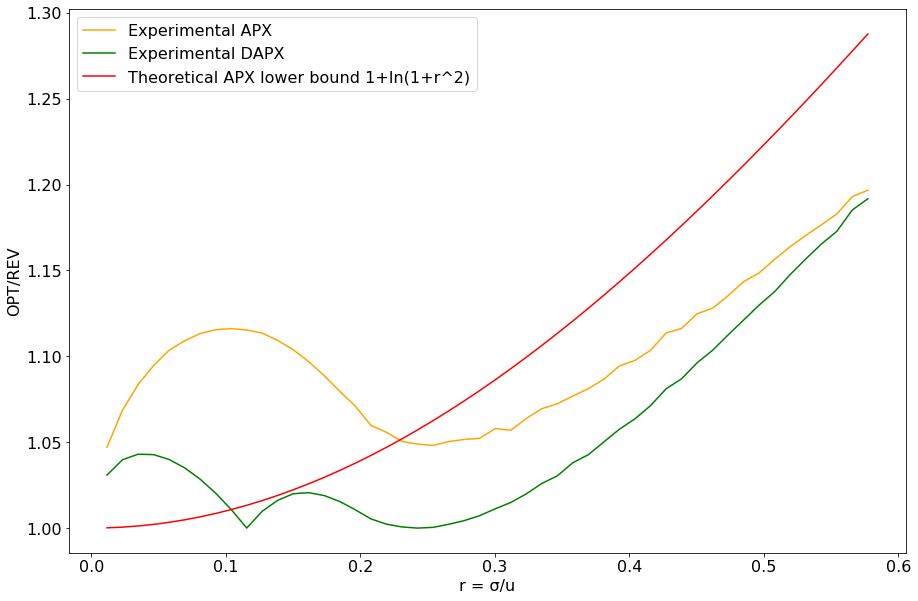

In [66]:
plt.figure(figsize=(15,10))
plt.xlabel("r = \u03C3/u",fontsize=16)
plt.ylabel("OPT/REV",fontsize=16)
plt.tick_params(axis='x', labelsize= 16)
plt.tick_params(axis='y', labelsize= 16)
plt.plot(r_list, APX_uniform_list,color="#FFA500",label="Experimental APX")
plt.plot(r_list, DAPX_uniform,color="green",label="Experimental DAPX")

lower_bound = 1+np.log(1+np.power(r_list,2))
#plt.plot(r_list, r_rho_list,color="blue",label="Theoretical APX upper bound \u03C1")
plt.plot(r_list, lower_bound,color="red",label="Theoretical APX lower bound 1+ln(1+r^2)")
plt.legend(loc="upper left",fontsize = 16)
plt.savefig("apxuni4.png",bbox_inches='tight')
plt.show()

In [44]:
import pandas as pd 
lower_bound = 1+np.log(1+np.power(r_list,2))  
# creating the DataFrame 
my_df = { 'r' : r_list,
          'DAPX_uniform': DAPX_uniform,
         'APX_uniform_list': APX_uniform_list, 
         'upper_bound':r_rho_list,
         'lower_bound':lower_bound
         } 
df = pd.DataFrame(my_df) 
  
   
# saving the DataFrame as a CSV file 
gfg_csv_data = df.to_csv('apx_uniform.csv', index = True) 
print('\nCSV String:\n', gfg_csv_data) 



CSV String:
 None


In [30]:
# Experiment Randomization auction first compute the log-lottery with uniform distribution:
sigma_list = []
DAPX_uniform = []
r_list =[]
reserve_p_list = []
p_d_list = []


APX_uniform_list = []
step =np.linspace(0, 5,1)
n = 1000000

def F(x):
    return ((x-1)**3)/((2*x-1)**2) - r**2   


def f(x):
    return (x * (1 + np.log(k2/(x**2) + 1) - np.log(2)) -u )
 
tic = time.clock()
for i in step:
    b = 20 - i
    a = 22 -b
    u = (a+b)/2
    sigma = np.sqrt((b-a)**2/12)

    bid_uniform = uniform.rvs(loc=a, scale=b-a,size=n)
    r = sigma/u
    r_list.append(r)
    sigma_list.append(sigma)

    p_d = fsolve(F, [u])
    print(F(p_d))
    p_d_list.append(p_d)
    p_reserve = p_d*u/(2*p_d-1)

    if (b/2 >= a):
        opt = auction_exp(bid_uniform,b/2)
    else:
        opt = auction_exp(bid_uniform,a)
    exp_revenue = auction_exp(bid_uniform,p_reserve)

    DAPX_uniform.append((opt/exp_revenue)[0])  

    k2 = u**2 + sigma**2
    pi1 = fsolve(f, [u])
    pi2 = 0.5*(k2/pi1 +pi1)
    print(f(pi1))
    rej_sample = []
    rexp_revenue_list=[]
    rej_sample = rejection_sampling(pi1,pi2,n)
    for i in np.arange(len(rej_sample)-1):
        if rej_sample[i] <= bid_uniform[i]:
            rexp_revenue_list.append(rej_sample[i])
  
    APX_uniform_list.append(opt/np.average(rexp_revenue_list))


toc = time.clock()
print('time: ' + str(toc-tic))


C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


[-2.77555756e-17]
[0.]
time: 341.2054671000078


C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:59: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [ ]:
# Experiment Randomisation first compute the log-lottery:

a = 6
b = 16
u = (a+b)/2
sigma = np.sqrt((b-a)**2/12)



def f(x):
  return (x * (1 + np.log(k2/(x**2) + 1) - np.log(2)) -u )


root = fsolve(F, [a,b])

pi1 = min(root)
pi2 = max(root)

don = pi2*np.log(pi2/pi1) - (pi2-pi1)
x = np.arange(pi1, pi2, 0.05)
y = (pi2/x-1)/don
plt.axhline((pi2/pi1-1)/don)
plt.plot(x,y)
plt.show()

In [ ]:
r = sigma/u
def solve_rho(x):
   return (1/(x**2))*(2*np.exp(x-1)-1)-1-r**2

upper = fsolve(solve_rho, 2)

lower = 1 + np.log(1+r**2)

print("when r = " + str(r) + ", our upper bound for APX = " + str(upper)+ " and  our lower bound = " + str(lower))          

In [45]:
#using rejection sampling, get N random price samples
####usefullllllll

def f(x):
  return (x * (1 + np.log(k2/(x**2) + 1) - np.log(2)) -u )

N = 100000
n = 0
#A =(pi2/pi1-1)*(pi2-pi1)/don
u = 1
sigma = 1

k2 = u**2 + sigma**2
pi1 = fsolve(f, [u])
pi2 = 0.5*(k2/pi1 +pi1)
print(pi1, pi2)

don = pi2*np.log(pi2/pi1) - (pi2-pi1)
env =(pi2/pi1-1)/don
rej_sample =[]
while(n <= N):
  x = uniform.rvs(loc=pi1, scale=pi2-pi1)
  a = (pi2/x-1)/don/env
  u1 = uniform.rvs()
  if (u1 <= a):
    rej_sample.append(x)
    n += 1

don = pi2*np.log(pi2/pi1) - (pi2-pi1)
x = np.arange(pi1, pi2, 0.05)
y = (pi2/x-1)/don


[0.27782386] [3.73831483]


In [46]:
print(f(pi1))

[0.]


C:\Users\Ariel Lou\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


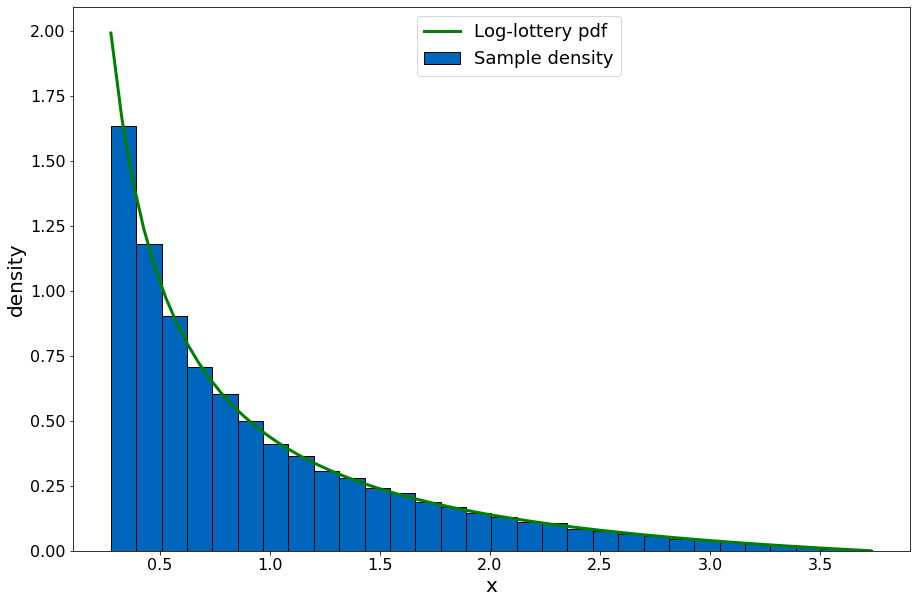

In [58]:
plt.figure(figsize=(15,10))
plt.tick_params(axis='x', labelsize= 16)
plt.tick_params(axis='y', labelsize= 16)

plt.xlabel("x",fontsize=20)
plt.ylabel("density",fontsize=20)

plt.hist(rej_sample, color = '#0065bd',normed=True, edgecolor = 'black',bins = 30, label = "Sample density")
plt.plot(x,y,color = 'green',linewidth=3,label = "Log-lottery pdf")

plt.legend(loc="upper left",fontsize = 18,bbox_to_anchor=(0.4,1))
plt.savefig("rejectionS.png",bbox_inches='tight')
plt.show()


In [ ]:
n = 10000
APX_list=[]
opt_list = []
exp_revenue_list = []
bid_uniform = uniform.rvs(loc=a, scale=b-a,size=n)
opt = auction_exp(bid_uniform,b/2)
for p_reserve in rej_sample:
  exp_revenue = auction_exp(bid_uniform,p_reserve)
  exp_revenue_list.append(exp_revenue)


print('Uniform distribution APX = ' + str(opt/np.average(exp_revenue_list)))

#print("Theoritical APX_normal:")
#print(b**2/(4*(b-a))/(reserve_p*(1-uniform.cdf(reserve_p,loc=a, scale=b-a))))

In [ ]:
# Experiment 1:
# random numbers from uniform distribution
# Generate 10000 numbers from 0 to 1 (run actuion 10000 times)
r = sigma/u

def F(x):
   return ((x-1)**3)/((2*x-1)**2) - r**2   
            

p_d =  fsolve(F, [u])

# np.isclose(F(x), [ 0.0])


data_uniform = uniform.rvs(loc=a, scale=b-a,size=n)
#p_d = 1 + 4* (sigma/u)**2
reserve_p = p_d*u/(2*p_d-1)
 
#opt = b**2/(4*(b-a)) #opt should also be in the experiment, one is average and another sum of it. 
opt = auction_exp(data_uniform,b/2)
exp_revenue = auction_exp(data_uniform,reserve_p)

DAPX = opt/exp_revenue
print('worst case robust DAPX = ' + str(p_d))
print('Uniform distribution DAPX = ' + str(DAPX))
print("Theoritically the DAPX_uniform:")
print(b**2/(4*(b-a))/(reserve_p*(1-uniform.cdf(reserve_p,loc=a, scale=b-a))))

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(r_list, DAPX_norm_list,color="green",marker="o",label="DAPX")
plt.plot(r_list, APX_norm_list,color="red",marker="o",label="APX")
plt.legend(loc="upper left",fontsize = 15)
plt.show()

In [ ]:
import scipy.special as sc
from scipy.optimize import fsolve
#not super accurate, but due to the character of cdf and pde maybe also factorial
u = 3
sigma = 1
def F(x):
   return [x[0] * (1 + np.log(x[1]/x[0])) - u,
           x[0] *(2*x[1]-x[0]) - u**2 - sigma**2]


root = fsolve(F, [1.8,4])
root
# np.isclose(F(x), [ 0.0])

In [ ]:
np.isclose(F(x), [1.49414051, 4.09347574])
x= [1.49414051, 4.09347574]
x[0] * (1 + np.log(x[1]/x[0])) - u
x[0] *(2*x[1]-x[0]) - u**2 - sigma**2

In [ ]:
x = np.arange(1, 5, 0.05)
u = 3
y = np.exp(u/x-1)*x
y1 = ((u**2 + sigma**2)/x +x)*0.5
plt.plot(x,y)
plt.plot(x,y1)
plt.show()

In [ ]:
pi2 = root[1]
pi1 = root[0]

don = pi2*np.log(pi2/pi1) - (pi2-pi1)
x = np.arange(pi1, pi2, 0.05)
y = (pi2/x-1)/don
plt.axhline(np.ceil((pi2/pi1-1)/don))
plt.plot(x,y)
plt.show()

In [ ]:

N = 10000
n = 0
A = np.ceil((pi2/pi1-1)/don)
rej_sample =[]
while(n <= N):
  x = uniform.rvs(loc=pi1, scale=pi2-pi1)
  a = (pi2/x-1)/don/(A/(pi2- pi1))
  u1 = uniform.rvs()
  if (u1 <= a):
    rej_sample.append(x)
    n += 1

plt.hist(rej_sample, color = 'blue', edgecolor = 'black',bins = 30)

In [ ]:
plt.hist(rej_sample, color = 'blue', edgecolor = 'black',bins = 30)

In [ ]:
1np.random.seed(5)
n = 10000
a = 2
b = 10 

u = 3
sigma = 1

data_uniform = uniform.rvs(loc=a, scale=b-a,size=n)

p_d = 1 + np.log(1 + (sigma/u)**2)

 
opt = u
revenue=0
for i in rej_sample:
  revenue += auction_exp(data_uniform,i)

exp_revenue = revenue/len(rej_sample)

APX = opt/exp_revenue
print('worst case robust APX upper bound = ' + str(p_d))
print('Uniform distribution APX = ' + str(APX))
